In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb

Welcome to JupyROOT 6.26/06


In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/JetValidation/analysis

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/JetValidation/analysis


In [10]:
direct = 'results_11_11'

f1 = ROOT.TFile.Open("ue_unfolding/dijet_calo_analysis_data_topo_pt7cut_wAj_wntopo.root")
h_jetspectra = TH1F(f1.Get("h_pass_spectra"))
h_deltaphi = TH1F(f1.Get("h_deltaphi"))
h_xj = TH1F(f1.Get("h_pass_xj"))
h_jetspectra.Scale(1.0/h_jetspectra.Integral())
h_deltaphi.Scale(1.0/h_deltaphi.Integral())
h_xj.Scale(1.0/h_xj.Integral())
h_jetspectra.SetDirectory(0)
h_deltaphi.SetDirectory(0)
h_xj.SetDirectory(0)
f1.Close()
f2 = ROOT.TFile.Open("ue_unfolding/dijet_calo_analysis_waveform_topocluster_simulation_pt7cut_wAj_wntopo.root")
h_mc_jetspectra = TH1F(f2.Get("h_pass_spectra"))
h_mc_deltaphi = TH1F(f2.Get("h_deltaphi"))
h_mc_xj = TH1F(f2.Get("h_pass_xj"))
h_mc_jetspectra.Scale(1.0/h_mc_jetspectra.Integral())
h_mc_deltaphi.Scale(1.0/h_mc_deltaphi.Integral())
h_mc_xj.Scale(1.0/h_mc_xj.Integral())
h_mc_jetspectra.SetDirectory(0)
h_mc_deltaphi.SetDirectory(0)
h_mc_xj.SetDirectory(0)
f2.Close()
f2 = ROOT.TFile.Open("ue_unfolding/dijet_calo_analysis_cluster_topocluster_simulation_pt7cut_wAj_wntopo.root")
h_clus_jetspectra = TH1F(f2.Get("h_pass_spectra"))
h_clus_deltaphi = TH1F(f2.Get("h_deltaphi"))
h_clus_xj = TH1F(f2.Get("h_pass_xj"))
h_clus_jetspectra.Scale(1.0/h_clus_jetspectra.Integral())
h_clus_deltaphi.Scale(1.0/h_clus_deltaphi.Integral())
h_clus_xj.Scale(1.0/h_clus_xj.Integral())
h_clus_jetspectra.SetDirectory(0)
h_clus_deltaphi.SetDirectory(0)
h_clus_xj.SetDirectory(0)
f2.Close()
f2 = ROOT.TFile.Open("ue_unfolding/dijet_calo_analysis_nozero_topocluster_simulation_pt7cut_wAj_wntopo.root")
h_nz_jetspectra = TH1F(f2.Get("h_pass_spectra"))
h_nz_deltaphi = TH1F(f2.Get("h_deltaphi"))
h_nz_xj = TH1F(f2.Get("h_pass_xj"))
h_nz_jetspectra.Scale(1.0/h_nz_jetspectra.Integral())
h_nz_deltaphi.Scale(1.0/h_nz_deltaphi.Integral())
h_nz_xj.Scale(1.0/h_nz_xj.Integral())
h_nz_jetspectra.SetDirectory(0)
h_nz_deltaphi.SetDirectory(0)
h_nz_xj.SetDirectory(0)
f2.Close()
f2 = ROOT.TFile.Open("ue_unfolding/dijet_calo_analysis_detroit_jet10_topocluster_simulation_pt7cut_wAj_wntopo.root")
h_dt_jetspectra = TH1F(f2.Get("h_pass_spectra"))
h_dt_deltaphi = TH1F(f2.Get("h_deltaphi"))
h_dt_xj = TH1F(f2.Get("h_pass_xj"))
h_dt_jetspectra.Scale(1.0/h_dt_jetspectra.Integral())
h_dt_deltaphi.Scale(1.0/h_dt_deltaphi.Integral())
h_dt_xj.Scale(1.0/h_dt_xj.Integral())
h_dt_jetspectra.SetDirectory(0)
h_dt_deltaphi.SetDirectory(0)
h_dt_xj.SetDirectory(0)
f2.Close()
print(h_jetspectra.GetEntries())
print(h_mc_jetspectra.GetEntries())
print(h_clus_jetspectra.GetEntries())
print(h_nz_jetspectra.GetEntries())
print(h_dt_jetspectra.GetEntries())

144950.0
554588.0
856646.0
644670.0
621570.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_jetspectra.png has been created


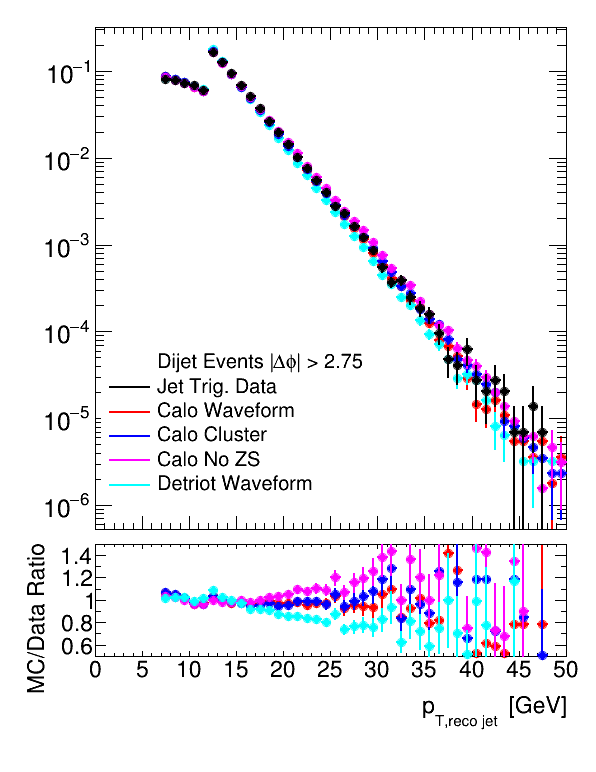

In [11]:
canvas = ROOT.TCanvas("canvas", "", 600, 800)
pad1 = ROOT.TPad("pad1", "", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # Adjust the margin for better separation
pad1.Draw()
pad1.cd()
pad1.SetLogy(1)  # Set logarithmic scale for the spectra plot

# Customize the histograms (color, marker, etc.)
h_jetspectra.SetStats(0)
h_mc_jetspectra.SetStats(0)
h_clus_jetspectra.SetStats(0)
h_nz_jetspectra.SetStats(0)
h_mc_jetspectra.SetLineColor(2)
h_mc_jetspectra.SetMarkerColor(2)
h_clus_jetspectra.SetLineColor(4)
h_clus_jetspectra.SetMarkerColor(4)
h_nz_jetspectra.SetLineColor(6)
h_nz_jetspectra.SetMarkerColor(6)
h_dt_jetspectra.SetLineColor(7)
h_dt_jetspectra.SetMarkerColor(7)

h_mc_jetspectra.GetXaxis().SetLabelSize(0)
h_jetspectra.GetXaxis().SetLabelSize(0)
h_clus_jetspectra.GetXaxis().SetLabelSize(0)
h_nz_jetspectra.GetXaxis().SetLabelSize(0)
h_dt_jetspectra.GetXaxis().SetLabelSize(0)

h_mc_jetspectra.Draw()
h_dt_jetspectra.Draw("same")
h_clus_jetspectra.Draw("same")
h_nz_jetspectra.Draw("same")  # Uncomment if needed
h_jetspectra.Draw("same")

# Add legend
leg = ROOT.TLegend(.17, .08, .55, .35)
leg.AddEntry("","Dijet Events |#Delta#phi| > 2.75","")
leg.AddEntry(h_jetspectra,"Jet Trig. Data","l")
leg.AddEntry(h_mc_jetspectra,"Calo Waveform","l")
leg.AddEntry(h_clus_jetspectra,"Calo Cluster","l")
leg.AddEntry(h_nz_jetspectra,"Calo No ZS","l")
leg.AddEntry(h_dt_jetspectra,"Detriot Waveform","l")
leg.Draw()
leg.SetTextSize(0.04)

canvas.cd()
pad2 = ROOT.TPad("pad2", "", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.02)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
ratio1 = h_mc_jetspectra.Clone("ratio1")
ratio1.Divide(h_jetspectra)
ratio2 = h_clus_jetspectra.Clone("ratio2")
ratio2.Divide(h_jetspectra)
ratio3 = h_nz_jetspectra.Clone("ratio3")
ratio3.Divide(h_jetspectra)
ratio4 = h_dt_jetspectra.Clone("ratio4")
ratio4.Divide(h_jetspectra)

ratio1.GetYaxis().SetTitle("MC/Data Ratio")
ratio1.GetYaxis().SetNdivisions(208)
ratio1.GetYaxis().SetRangeUser(0.5,1.5)
ratio1.GetYaxis().SetTitleSize(25)
ratio1.GetYaxis().SetTitleFont(43)
ratio1.GetYaxis().SetTitleOffset(1.5)
ratio1.GetYaxis().SetLabelFont(43)
ratio1.GetYaxis().SetLabelSize(25)
ratio1.GetXaxis().SetTitle("p_{T,reco jet} [GeV]")
ratio1.GetXaxis().SetTitleSize(25)
ratio1.GetXaxis().SetTitleFont(43)
ratio1.GetXaxis().SetTitleOffset(0)
ratio1.GetXaxis().SetLabelFont(43)
ratio1.GetXaxis().SetLabelSize(25)

# Draw ratio plots
ratio1.Draw("ep")
ratio2.Draw("same ep")
ratio3.Draw("same ep")  # Uncomment if needed
ratio4.Draw("same ep")

# Update canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_jetspectra.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_deltaphi.png has been created


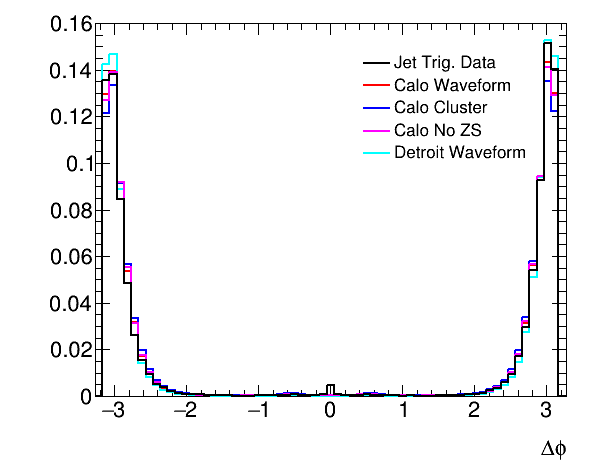

In [12]:
canvas = ROOT.TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.6,.65,.85,.89)
leg.AddEntry(h_deltaphi,"Jet Trig. Data","l")
leg.AddEntry(h_mc_deltaphi,"Calo Waveform","l")
leg.AddEntry(h_clus_deltaphi,"Calo Cluster","l")
leg.AddEntry(h_nz_deltaphi,"Calo No ZS","l")
leg.AddEntry(h_dt_deltaphi,"Detroit Waveform","l")
leg.SetTextSize(0.04)
h_deltaphi.SetStats(0)
h_mc_deltaphi.SetStats(0)
h_clus_deltaphi.SetStats(0)
h_nz_deltaphi.SetStats(0)
h_dt_deltaphi.SetStats(0)
h_mc_deltaphi.SetLineColor(2)
h_mc_deltaphi.SetMarkerColor(2)
h_clus_deltaphi.SetLineColor(4)
h_clus_deltaphi.SetMarkerColor(4)
h_nz_deltaphi.SetLineColor(6)
h_nz_deltaphi.SetMarkerColor(6)
h_dt_deltaphi.SetLineColor(7)
h_dt_deltaphi.SetMarkerColor(7)
h_mc_deltaphi.GetYaxis().SetRangeUser(0,0.16)
h_mc_deltaphi.GetXaxis().SetRangeUser(-3.2,3.2)
h_mc_deltaphi.Draw('hist')
h_dt_deltaphi.Draw('hist,same')
h_clus_deltaphi.Draw('hist,same')
h_nz_deltaphi.Draw('hist,same')
h_deltaphi.Draw('hist,same')
h_mc_deltaphi.SetXTitle("#Delta#phi") 
canvas.SetLogy(0)
leg.Draw()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_deltaphi.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_xj.png has been created


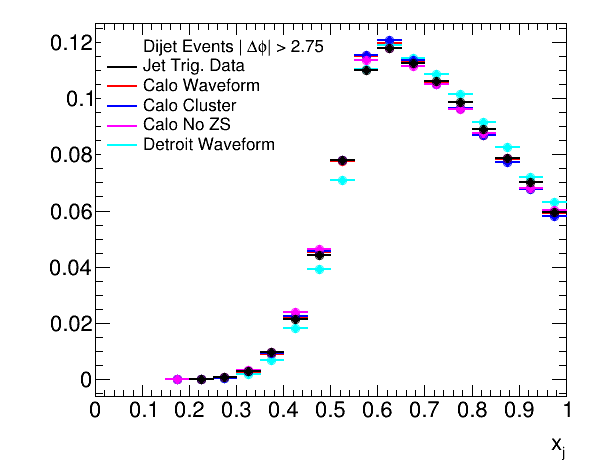

In [13]:
canvas = ROOT.TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.17,.67,.45,.92)
leg.AddEntry("","Dijet Events |#Delta#phi| > 2.75","")
leg.AddEntry(h_xj,"Jet Trig. Data","l")
leg.AddEntry(h_mc_xj,"Calo Waveform","l")
leg.AddEntry(h_clus_xj,"Calo Cluster","l")
leg.AddEntry(h_nz_xj,"Calo No ZS","l")
leg.AddEntry(h_dt_xj,"Detroit Waveform","l")
leg.SetTextSize(0.04)
h_xj.SetStats(0)
h_mc_xj.SetStats(0)
h_clus_xj.SetStats(0)
h_nz_xj.SetStats(0)
h_dt_xj.SetStats(0)
h_mc_xj.SetLineColor(2)
h_mc_xj.SetMarkerColor(2)
h_clus_xj.SetLineColor(4)
h_clus_xj.SetMarkerColor(4)
h_nz_xj.SetLineColor(6)
h_nz_xj.SetMarkerColor(6)
h_dt_xj.SetLineColor(7)
h_dt_xj.SetMarkerColor(7)
h_mc_xj.Draw()
h_dt_xj.Draw('same')
h_clus_xj.Draw('same')
h_nz_xj.Draw('same')
h_xj.Draw('same')
h_mc_xj.SetXTitle("x_{j}") 
canvas.SetLogy(0)
leg.Draw()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_xj.png")